In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
from scipy.integrate import trapz
from scipy.stats import ttest_ind
from scipy import ndimage
import matplotlib as mpl

In [2]:
mpl.rc('figure',dpi=144)
mpl.rc('text', usetex=False)
mpl.rc('axes',titlesize=16)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('axes', labelsize=14)
mpl.rc('legend', fontsize=10)
mpl.rc('image',interpolation=None)

In [22]:
forders = ['Acrobot-v1','CartPole-v1','MountainCarContinuous-v0']
sigma = ['02','005','01']

env = 0

trainFolder = './results/train/' + forders[env]
testFolder = './results/test/' + forders[env]

denseTrain = np.load(trainFolder + '/dense/' + forders[env] + '-dense-scores.npy')
denseTest = np.load(testFolder + '/dense/' + forders[env] + '-dense-scores.npy')

focusedTrain = np.load(trainFolder + '/focused-' + sigma[env] + '/' + forders[env] + '-focused-scores.npy')
focusedTest = np.load(testFolder + '/focused/' + forders[env] + '-focused-scores.npy')

In [23]:
statistic, pvalue = ttest_ind(denseTest,focusedTest)

print('statistic: ',float(statistic))
print('pvalue: ',float(pvalue))

d1=denseTest
d2=focusedTest
print(f'denseTest mean {np.mean(d1)}, std :{np.std(d1)}')
print(f'focusedTest mean {np.mean(d2)}, std :{np.std(d2)}')


statistic:  nan
pvalue:  nan
denseTest mean -200.0, std :0.0
focusedTest mean -200.0, std :0.0


C:\Users\kakun\.conda\envs\tf2\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\kakun\.conda\envs\tf2\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\kakun\.conda\envs\tf2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


C:\Users\kakun\.conda\envs\tf2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\kakun\.conda\envs\tf2\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in greater_equal
  return (a <= x) & (x <= b)
C:\Users\kakun\.conda\envs\tf2\lib\site-packages\scipy\stats\_distn_infrastructure.py:899: RuntimeWarning: invalid value encountered in less_equal
  return (a <= x) & (x <= b)
C:\Users\kakun\.conda\envs\tf2\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\kakun\.conda\envs\tf2\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\kakun\.conda\envs\tf2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1740: RuntimeWarning: inval

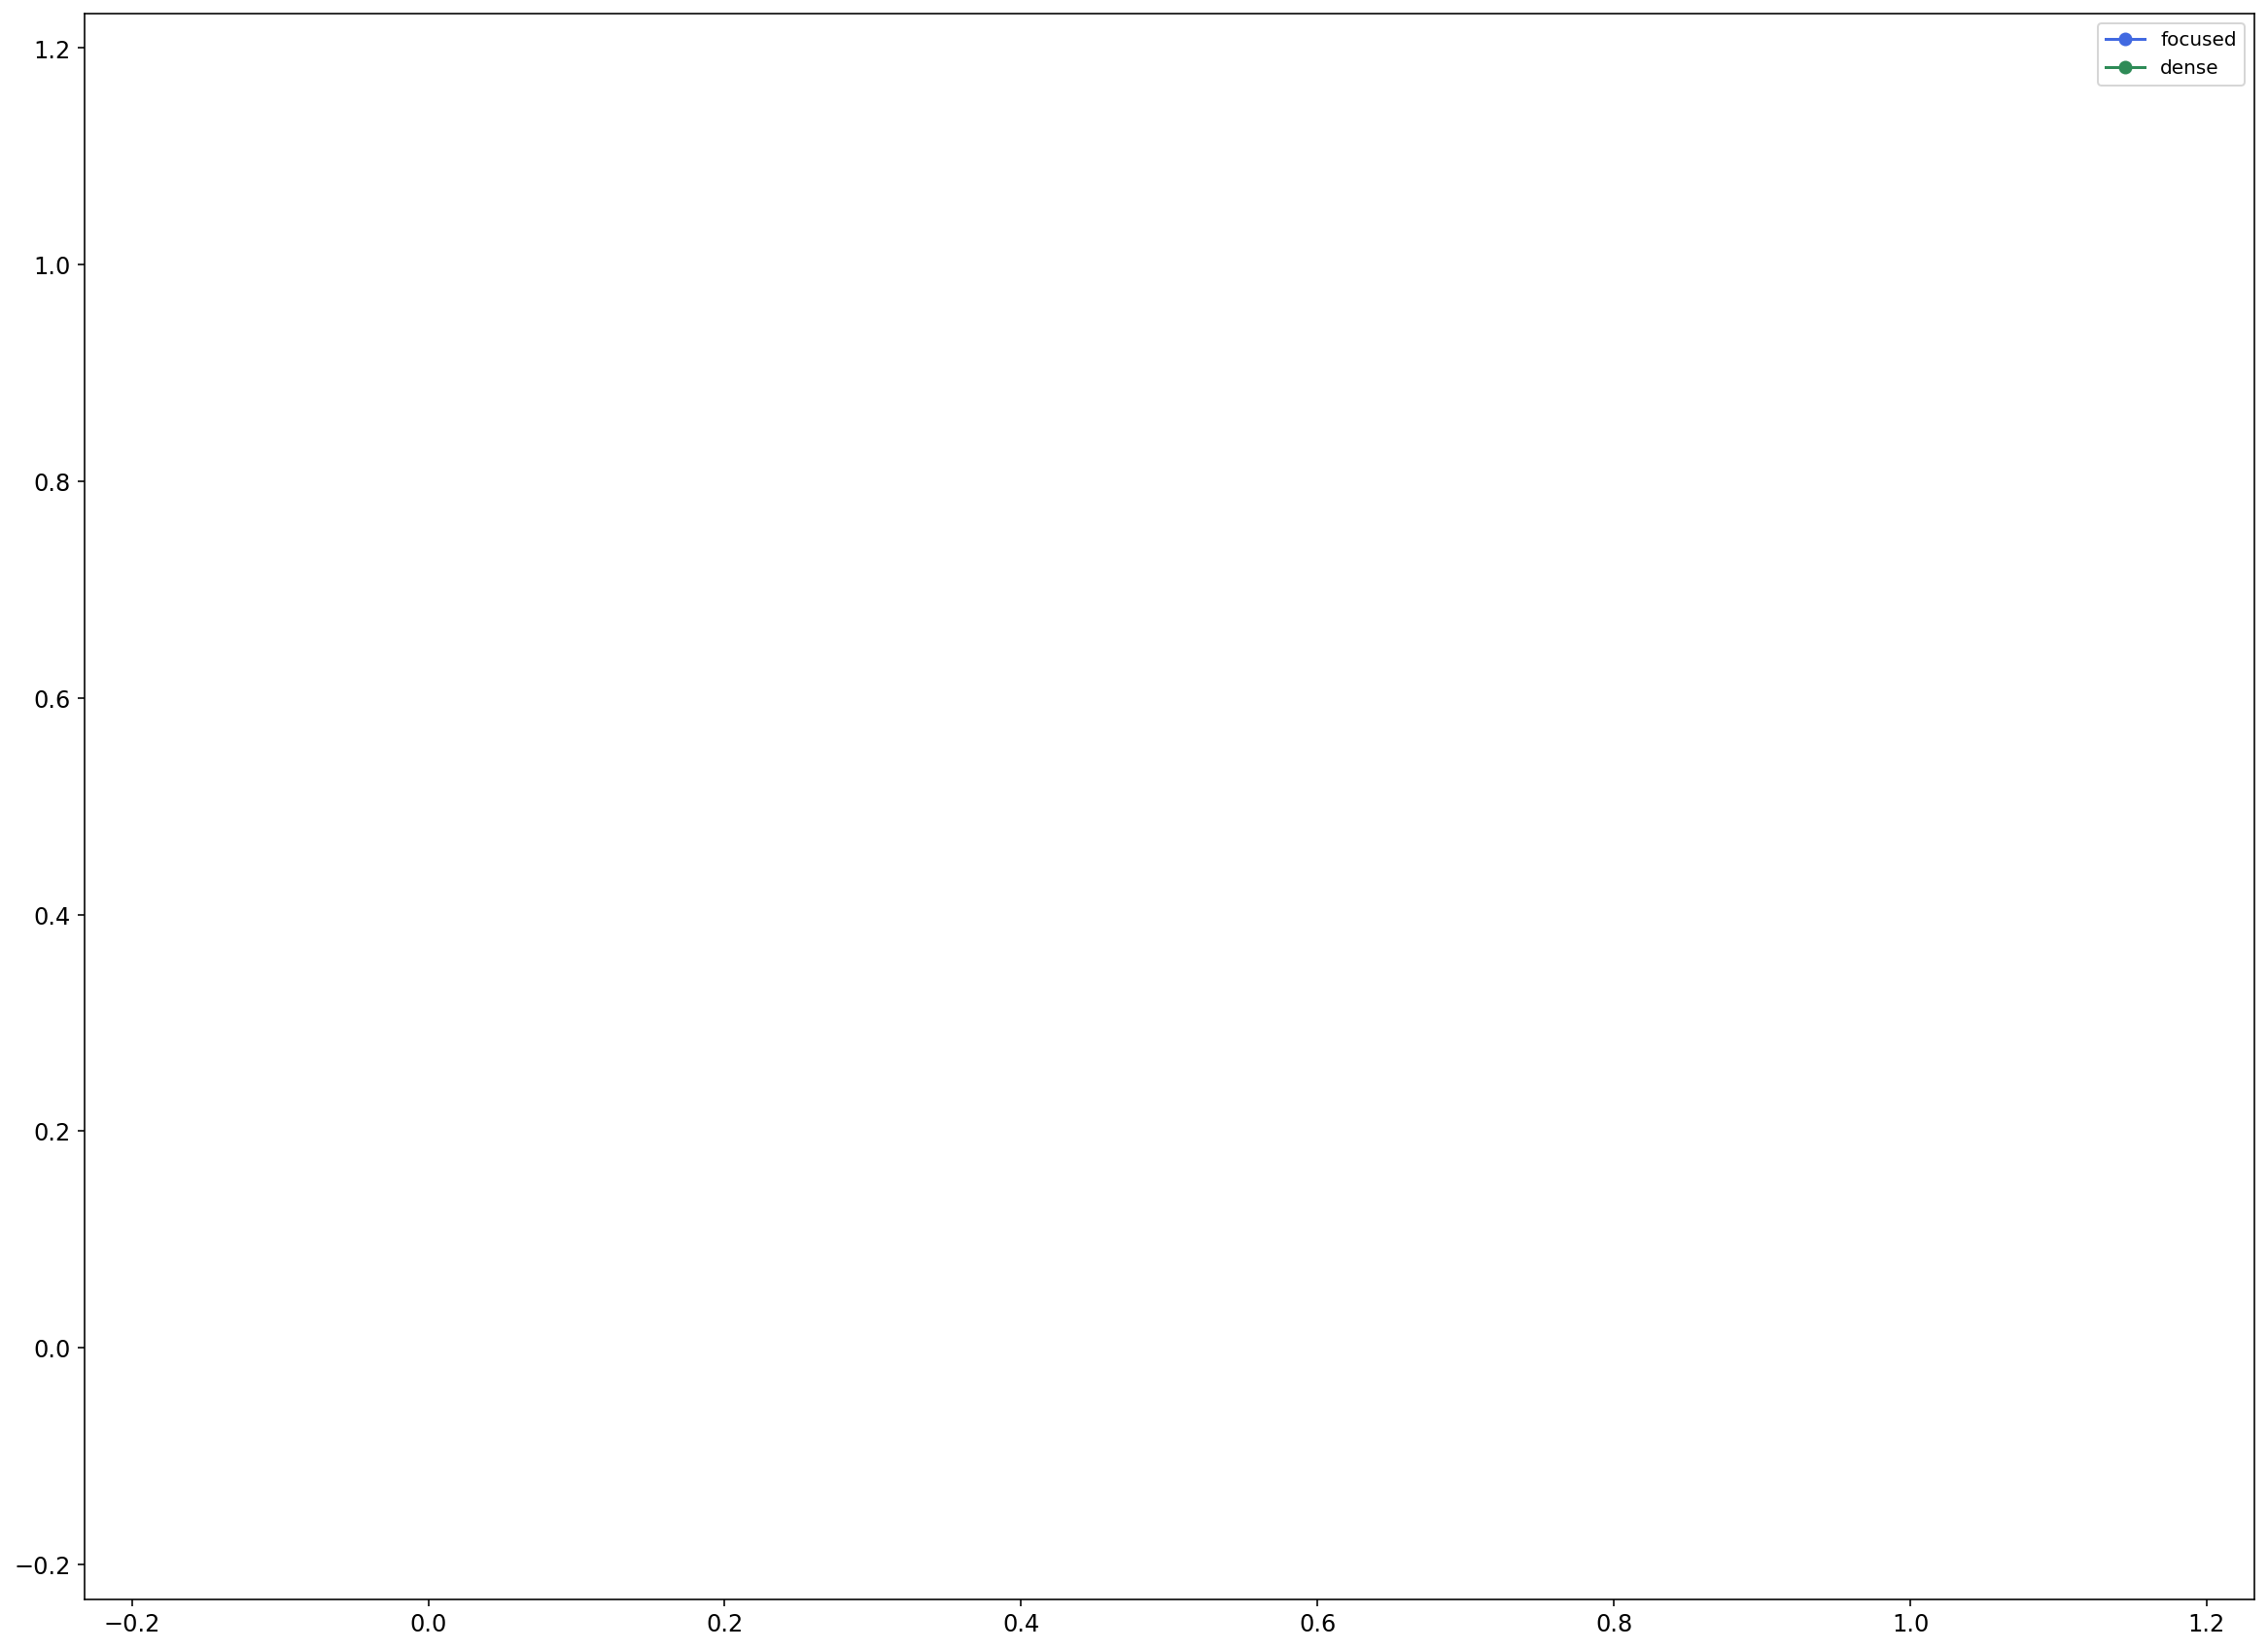

In [24]:
plt.figure(figsize=(20,15))
d = np.sort(focusedTest)
mean = np.mean(d)
std = np.std(d)
fit = stats.norm.pdf(d, mean, std)
hist, bin_edges = np.histogram(d, bins=np.linspace(d.min(),d.max(),100))
plt.plot(d, fit,'-o', color='royalblue')
plt.hist(d, bins=bin_edges, density=True, alpha=0.5, color='royalblue')

d = np.sort(denseTest)
mean = np.mean(d)
std = np.std(d)
fit = stats.norm.pdf(d, mean, std)
hist, bin_edges = np.histogram(d, bins=np.linspace(d.min(),d.max(),100))
plt.plot(d, fit,'-o', color="seagreen")
plt.hist(d, bins=bin_edges, density=True, alpha=0.5, color="seagreen")

plt.legend(['focused', 'dense'])

plt.savefig('./plots/histograms/'+forders[env]+'_dense _focused_test.png', bbox_inches="tight")

plt.show()